# Data wrangling WeRateDogs

## Table of Contents
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality Issues](#quality)
   - [Tidiness Issues](#tidiness) 
- [Cleaning data](#clean)
- [Analysis, and Visualizing](#analysis)
   - [Insight and Visualization](#one)

In [799]:
#Importing libraries 
import json 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 
import pandas as pd
import requests 
import seaborn as sns 
import tweepy 
import time 

from datetime import datetime 
from functools import reduce  

<a id='gather'></a>
### Gathering Data

Reference 
* https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
* https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object3
* https://stackoverflow.com/questions/6159900/correct-way-to-write-line-to-file 
* https://stackoverflow.com/questions/4706499/how-do-you-append-to-a-file 
* https://stackoverflow.com/questions/41001973/python-3-5-1-nameerror-name-json-is-not-defined 
* https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json 
* https://gist.github.com/yanofsky/5436496 
* https://stackoverflow.com/questions/11716380/python-beautifulsoup-extract-text-from-anchor-tag 
* https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe 
* https://stackoverflow.com/questions/15247628/how-to-find-duplicate-names-using-pandas
* https://stackoverflow.com/questions/466345/converting-string-into-datetime 
* https://stackoverflow.com/questions/33034559/how-to-remove-last-the-two-digits-in-a-column-that-is-of-integer-type 
* https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python 
* https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict 
* https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical 
* https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column
* https://stackoverflow.com/questions/45976585/combine-pandas-string-columns-with-missing-values



#### 1. Twitter archive file

In [800]:
#Reading the twitter archive file
tw_arc = pd.read_csv('twitter-archive-enhanced.csv')
tw_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [801]:
#tw_arc.info()

**2. Tweet image prediction**

In [802]:
#Downloading URL programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

#Reading the TSV file 
image_pred = pd.read_csv('image_predictions.tsv', sep='\t' )
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [803]:
#image_pred.info()

**3. Downloading Twitter data through Twitter API**

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# use jsonparser to make json readable content, create json dumps and query json objects
# wait_on_rate_limit = True , allows the program to wait during timeouts 
# wait_on_rate_limit_notify = True, writes to screen when waiting
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# function to append file line by line
# The function was adapted from https://stackoverflow.com/questions/4706499/how-do-you-append-to-a-file
# input: the function takes a filename string and text
# process: the function opens a file and adds the text in append mode
def FileSave(filename,content):
    with open(filename, "a") as myfile:
        myfile.write(content)

In [8]:
# input: the function takes a list of tweet ids and a filename
# process: the function downloads tweets corresponding to a tweet ids and adds it to a file
# out: the function prints out the time taken to download the tweets, prints the error msgs and
# returns a list of ids that could not be downloaded

def download_tweets(id_list,filename):

    # set the start time
    start_time = time.time()

    unloaded_tweet_ids=[]
    counter=0
    for i in id_list:
        try:
            #print(counter,' >> Tweet id: ',i)
            tweet=api.get_status(i,tweet_mode='extended')
            FileSave(filename,json.dumps(tweet)+'\n')
            counter=counter+1

        except Exception as download_error_msg:
            print(counter,' >> Tweet id: ',i)
            print(download_error_msg)
            unloaded_tweet_ids.append(i)
            counter=counter+1


    #print unloaded tweeter ids
    print('\n \nTotal number of Tweeter ids :',len(id_list))
    print('The following ',len(unloaded_tweet_ids), 'tweet ids could not be downloaded for various reasons: ')
    print(unloaded_tweet_ids)

    # set the end time
    end_time = time.time()

    # print the execution time
    print('\n \nThe download process took: ', (end_time - start_time)/60, ' minutes')

    return(unloaded_tweet_ids)

In [ ]:
# set the tweet ids that will be using in the api to access the actual data
tweet_id=tw_arc['tweet_id']

# download tweets by passing the tweet_id list and tweet_json.txt filename
# save the results of unloaded ids so they can be attempted again
error_ids_01=download_tweets(tweet_id,'tweet_json.txt')

In [ ]:
error_ids_02=download_tweets(error_ids_01,'tweet_json.txt')

In [804]:
#Reading json file to a list array
lines = [line.rstrip('\n') for line in open('tweet_json.txt')]

In [805]:
#Read one tweet into a temp file zo examine its content
#Load the tweet into a json format for easier extraction of information 

tmp = json.loads(lines[0])

#Examine a tweet 

tmp

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [806]:
print (tmp['full_text'])
tmp

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [807]:
#Extract elements from the lines list 

#Total number of tweets 
no_of_tweets = len(lines)
# len(lines)

# We initialize a set of list for holding infos
tweet_ids = []
tweet_created = []
tweet_full_text = []
tweet_favorite_count = []
tweet_retweet_count= []

for i in range(len(lines)):
    tmp= json.loads(lines[i])
    tweet_ids.append(tmp['id'])
    tweet_created.append(tmp['created_at'])
    tweet_full_text.append(tmp['full_text'])
    tweet_favorite_count.append(tmp['favorite_count'])
    tweet_retweet_count.append(tmp['retweet_count'])
    
print(i)

2330


In [808]:
lists = [tweet_ids, tweet_created, tweet_full_text,tweet_favorite_count,tweet_retweet_count]
json_tweets = pd.concat([pd.Series(x) for x in lists], axis=1)
json_tweets.columns = ['tweet_id', 'time_created','full_text','favorite_count','retweet_count'] 


In [809]:
json_tweets

,tweet_id,time_created,full_text,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,36067,7678
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,31105,5678
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,23418,3763
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,39337,7851
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,37582,8449
...,...,...,...,...,...
2326,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...,96,40
2327,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...,271,131
2328,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...,112,41
2329,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...,121,42


In [810]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   time_created    2331 non-null   object
 2   full_text       2331 non-null   object
 3   favorite_count  2331 non-null   int64 
 4   retweet_count   2331 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [811]:
def find_duplicates(df_column):
    names=df_column.value_counts()
    return(names[names>1])

<a id='assess'></a>
## Assessing data

#### Analysing the twitter archive dataset

In [812]:
tw_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [813]:
tw_arc.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [814]:
tw_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1721,680130881361686529,NaN,NaN,2015-12-24 21:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,None,None,None,None


In [815]:
#checking for false decimal rating for rating_numerator
tw_arc[tw_arc.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

D:\Anaconda 2020\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [816]:
#we have to chnage the type from int to float (for rating_numerator and rating_demoninator)
tw_arc[['rating_numerator', 'rating_denominator']] = tw_arc[['rating_numerator','rating_denominator']].astype(float)

#tw_arc.info()

#First change numerator and denominators type int to float to allow decimals 
tw_arc[['rating_numerator', 'rating_denominator']] = tw_arc[['rating_numerator','rating_denominator']].astype(float)

#Update numerators manually

tw_arc.loc[(tw_arc.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
tw_arc.loc[(tw_arc.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
tw_arc.loc[(tw_arc.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
tw_arc.loc[(tw_arc.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
tw_arc.loc[(tw_arc.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(tw_arc[tw_arc['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

D:\Anaconda 2020\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.00,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [817]:
tw_arc.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


In [818]:
find_duplicates(tw_arc.tweet_id)

Series([], Name: tweet_id, dtype: int64)

In [819]:
find_duplicates(tw_arc.text)

Series([], Name: text, dtype: int64)

In [820]:
find_duplicates(tw_arc.source)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [821]:
find_duplicates(tw_arc.expanded_urls)

https://twitter.com/dog_rates/status/768193404517830656/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/762699858130116608/photo/1                                                                                                                                                                                                                                              2
http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1    2
https://twitter.com/dog_rates/status/679462823135686656/photo/1                            

In [822]:
find_duplicates(tw_arc.rating_numerator)

12.0     558
11.0     464
10.0     461
13.0     351
9.0      158
8.0      102
7.0       55
14.0      54
5.0       35
6.0       32
3.0       19
4.0       17
2.0        9
1.0        9
0.0        2
15.0       2
420.0      2
Name: rating_numerator, dtype: int64

In [823]:
find_duplicates(tw_arc.rating_denominator)

10.0    2333
11.0       3
50.0       3
20.0       2
80.0       2
Name: rating_denominator, dtype: int64

In [824]:
find_duplicates(tw_arc.name)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Rocky         2
Philbert      2
Betty         2
Elliot        2
Curtis        2
Name: name, Length: 295, dtype: int64

In [825]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Analysing the image_predictions dataset

In [826]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [827]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
374,672995267319328768,https://pbs.twimg.com/media/CVb1mRiWcAADBsE.jpg,1,French_bulldog,0.719559,True,boxer,0.166927,True,Boston_bull,0.101354,True
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [828]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [829]:
find_duplicates(image_pred.tweet_id)

Series([], Name: tweet_id, dtype: int64)

In [830]:
find_duplicates(image_pred.jpg_url)

https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                       

In [831]:
# a function that extracts the first dog breed prediction from the image predictions DataSet
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [832]:
# apply the breed function to the clean DataFrame to create a new column 'breed_pred'
image_pred['breed_pred'] = image_pred.apply (lambda row: breed (row),axis=1)

In [833]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


#### Analysing the tweet_json dataframe

In [834]:
json_tweets.head()

,tweet_id,time_created,full_text,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,36067,7678
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,31105,5678
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,23418,3763
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,39337,7851
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,37582,8449


In [835]:
json_tweets.sample(5)

,tweet_id,time_created,full_text,favorite_count,retweet_count
1779,676946864479084545,Wed Dec 16 02:08:04 +0000 2015,This pups goal was to get all four feet as clo...,1694,361
680,786363235746385920,Thu Oct 13 00:29:39 +0000 2016,This is Rizzo. He has many talents. A true ren...,11042,3567
1285,707059547140169728,Tue Mar 08 04:25:07 +0000 2016,Say hello to Cupcake. She's an Icelandic Dippe...,2571,666
1139,723673163800948736,Sat Apr 23 00:41:42 +0000 2016,This is Ivar. She is a badass Viking warrior. ...,2976,877
161,859607811541651456,Wed May 03 03:17:27 +0000 2017,Sorry for the lack of posts today. I came home...,17851,1484


In [836]:
json_tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7531.241956,2694.401973
std,6.823170e+16,11691.006670,4555.604727
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1313.500000,545.500000
50%,7.182469e+17,3273.000000,1262.000000
75%,7.986692e+17,9221.500000,3133.000000
max,8.924206e+17,155569.000000,77506.000000


In [837]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   time_created    2331 non-null   object
 2   full_text       2331 non-null   object
 3   favorite_count  2331 non-null   int64 
 4   retweet_count   2331 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


In [838]:
find_duplicates(json_tweets.tweet_id)

Series([], Name: tweet_id, dtype: int64)

In [839]:
len(json_tweets)

2331

In [840]:
find_duplicates(json_tweets.full_text)

Series([], Name: full_text, dtype: int64)

<a id='quality'></a>
### Quality Issues 

Visual & Programmatically - completness, validity, accuracy, consistency

#### Twitter_archive Data

- The expanded_url column, has some repeated multiple urls which is separated by a comma
- The name column has non name strings such as None, a, an 
- Rating_denominator as high as 80
- The following variables should be integers instead of floats: in_reply_to_status_id,in_reply_to_user_id,    
  retweeted_status_id,retweeted_status_user_id 
- Contains retweets
- The anchor text in source column is repeated numerous times

#### Image_predictions Data

- p1, p2,p3: upper and lower case mixed together
- p1, p2,p3: dash and underscore mixed in string eg. black-and-tan_coonhound    
- Missing values when compared to twitter_archive dataframe

#### Tweet_json Data

- time_created should be a data/time object
- dropping unnecessary columns 


<a id='tidiness'></a>
### Tidiness Issues 

**In Twitter_archive Data**
- Variables called 'doggo', 'floofer', 'pupper', 'puppo' are different growth stages of a pet based on age, merge this in one column.

**Merging 3 datasets**

- Merge 3 datasets(Twitter_archive Data,Image_predictions Data, Tweet_json Data ) into final dataset. 

<a id='clean'></a>
# Data Cleaning 

#### (Define) Cleaning the twitter_archive dataframe

1. format the timestamp to datetime format
2. add column for the month, weekday and hour the tweet was created 
3. remove retweets 
4. convert source to categorical value
5. remove duplicated multiple urls in expanded_urls variable
6. remove non name characters from name variable
7. dropping unnecessary columns 
8. change the rating denominator to 10

In [841]:
# making a copy of the twitter_archive dataframe
tw_arc_clean=tw_arc.copy()

In [842]:
#tw_arc

In [843]:
# 1. format the timestamp to datetime format
tw_arc_clean.timestamp=tw_arc_clean.timestamp.str[:-6]
#tw_arc_clean
tw_arc_clean['timestamp'] =  pd.to_datetime(tw_arc_clean['timestamp'], format='%Y-%m-%d %X')

tw_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [844]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

In [845]:
# 2. add columns for the month, weekday and hour the tweet was created

tw_arc_clean['timestamp_month']=tw_arc_clean.timestamp.map(lambda a: a.month)
tw_arc_clean['timestamp_weekday']=tw_arc_clean.timestamp.map(lambda a: a.weekday())
tw_arc_clean['timestamp_hour']=tw_arc_clean.timestamp.map(lambda a: a.hour)

#tw_arc_clean.head()

In [846]:
#tw_arc_clean.retweeted_status_id

In [847]:
# 3. remove reweets
index_original_tweet = pd.isnull(tw_arc_clean['retweeted_status_id'])
tw_arc_clean = tw_arc_clean[index_original_tweet]

tw_arc_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [848]:
# 4. Convert source to categorical value
tw_arc_clean.source.value_counts()


# create a dictionary for mapping
source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

# map the dictionary 
tw_arc_clean['source']=tw_arc_clean['source'].replace(source)

print(tw_arc_clean['source'].value_counts())

# convert the source variable to a categorical object
tw_arc_clean['source']=tw_arc_clean['source'].astype('category')

# hows that source variable is now sa category 
tw_arc_clean.info()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   category      
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   o

In [849]:
tw_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_month,timestamp_weekday,timestamp_hour
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,8,1,16
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,8,1,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,7,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,7,6,15
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,7,5,16


In [850]:
# 5. remove duplicated mutiple urls in expanded_urls variable

tw_arc_clean.expanded_urls.head(10).map(lambda a : print(a))

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: expanded_urls, dtype: object

In [851]:
# 6. remove non name characters from name variable

tw_arc_clean.name.value_counts()

None       680
a           55
Charlie     11
Lucy        11
Oliver      10
          ... 
Jareld       1
Mojo         1
Rilo         1
Edmund       1
Odin         1
Name: name, Length: 956, dtype: int64

In [852]:
# tw_arc_clean['name']=tw_arc_clean['name'].replace('None', np.NaN, )
# # Replace 'a' with Nan
# tw_arc_clean['name']=tw_arc_clean['name'].replace('a', np.NaN, )
# # Replace 'an' with Nan
# tw_arc_clean['name']=tw_arc_clean['name'].replace('an', np.NaN, )

tw_arc_clean['name'] = tw_arc_clean['name'].str.replace('^[a-z]+', 'None')

#print(tw_arc_clean['name'].value_counts())
tw_arc_clean['name'].value_counts()

tw_arc_clean['name'].sample(10)

1500      Edgar
807        None
1585    Jackson
1109      Terry
2280       Fwed
1813       None
1197     Smokey
1216    Calbert
1681    Jimothy
2133    Winston
Name: name, dtype: object

In [853]:
# 7. dropping unnecessary columns 

drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                'retweeted_status_user_id','retweeted_status_timestamp']

tw_arc_clean= tw_arc_clean.drop(drop_columns, axis=1) 


tw_arc_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_month,timestamp_weekday,timestamp_hour
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,8,1,16
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,8,1,0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,7,0,0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,7,6,15
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,7,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None,11,0,0
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,None,None,None,None,11,0,0
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,None,None,None,None,11,6,23
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,None,None,None,None,11,6,23


In [854]:
# 8. Change the rating denominator to 10

tw_arc_clean.rating_denominator.value_counts()
tw_arc_clean.rating_denominator=10


tw_arc_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [855]:
tw_arc_clean.rating_numerator.value_counts()
tw_arc_clean.query("rating_numerator!=10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_month,timestamp_weekday,timestamp_hour
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8,1,16
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,8,1,0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,7,0,0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,7,6,15
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,7,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,None,None,None,11,0,0
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,None,None,None,None,11,0,0
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,None,None,None,None,11,6,23
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,None,None,None,11,6,23


In [856]:
 tw_arc_clean.query("rating_denominator!=10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,timestamp_month,timestamp_weekday,timestamp_hour


#### Tidiness Issue 

In [857]:
# making one column for (doggo, floofer, pupper and  puppo ) in Twitter_archive Data
dog_col = ['doggo', 'floofer', 'pupper', 'puppo']

dog_digtionary = tw_arc_clean[dog_col].replace('None', '')
tw_arc_clean['dog_digtionary'] = dog_digtionary.apply(lambda x: ''.join(x), axis=1).replace('^$', np.nan, regex=True)

tw_arc_clean.drop(dog_digtionary, axis=1, inplace=True)

tw_arc_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_month,timestamp_weekday,timestamp_hour,dog_digtionary
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8,1,16,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,8,1,0,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,7,0,0,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7,6,15,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,7,5,16,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,7,5,0,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,7,4,16,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,7,4,0,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,7,3,16,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,7,2,15,doggo


#### Cleaning image_predictions data

In [858]:
#making a copy of it 
image_pred_clean=image_pred.copy()

#dropping the 'img_num' column 
image_pred_clean=image_pred_clean.drop('img_num',axis=1)

image_pred_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


#### Cleaning json tweets data

In [859]:
# making a copy of it 
json_tweets_clean=json_tweets.copy()

# dropping unnecessary columns 
drop_columns=['full_text','time_created']
json_tweets_clean=json_tweets_clean.drop(drop_columns,axis=1)



In [860]:
find_duplicates(json_tweets.tweet_id)

json_tweets_cleaned = json_tweets_clean.drop_duplicates(keep='first')
json_tweets_cleaned.info


<bound method DataFrame.info of                 tweet_id  favorite_count  retweet_count
0     892420643555336193           36067           7678
1     892177421306343426           31105           5678
2     891815181378084864           23418           3763
3     891689557279858688           39337           7851
4     891327558926688256           37582           8449
...                  ...             ...            ...
2326  666049248165822465              96             40
2327  666044226329800704             271            131
2328  666033412701032449             112             41
2329  666029285002620928             121             42
2330  666020888022790149            2404            460

[2331 rows x 3 columns]>

#### Merging the data sets  (Tidiness issue)

In [861]:
# Merging cleaned twitter archive data with cleaned image predictions data

merge1=pd.merge(tw_arc_clean,image_pred_clean, on='tweet_id', how='left')
merge1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_month,timestamp_weekday,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8,1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,8,1,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,7,0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7,6,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,7,5,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset


In [862]:
# Merging the merge1 with cleaned json tweets data

final_data=pd.merge(merge1,json_tweets_clean,on='tweet_id', how='left')

final_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_month,timestamp_weekday,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8,1,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,36067.0,7678.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,8,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,31105.0,5678.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,7,0,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,23418.0,3763.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7,6,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,39337.0,7851.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,7,5,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,37582.0,8449.0


In [863]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   category      
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   float64       
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   timestamp_month     2175 non-null   int64         
 9   timestamp_weekday   2175 non-null   int64         
 10  timestamp_hour      2175 non-null   int64         
 11  dog_digtionary      344 non-null    object        
 12  jpg_url             1994 non-null   object        
 13  p1                  1994 non-null   object      

In [864]:
final_data.to_csv('twitter_archive_master.csv', index=False)

In [865]:
final = pd.read_csv('twitter_archive_master.csv')

In [866]:
final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,timestamp_month,timestamp_weekday,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,8,1,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,36067.0,7678.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,8,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,31105.0,5678.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,7,0,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,23418.0,3763.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,7,6,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,39337.0,7851.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,7,5,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,37582.0,8449.0


<a id='analysis'></a>
### Analysis and Visualization

Reference 
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
* https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
* https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

<a id='one'></a>
#### Insights 

In [867]:
#final_data.head()

* Is the tweet that received the most favorites count also the tweet that was retweeted most?
* What day of the week were most of the tweets created?
* Which dog breed is most common?

In [868]:
#importing necessary libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
sns.set(style="whitegrid", color_codes=True)
from PIL import Image
from io import BytesIO

###### Question 1: Is the tweet that received the most favorites count also the tweet that was retweeted most?

In [869]:
Q1=final_data.sort_values(by=['favorite_count','retweet_count'],
                        ascending=False)[['tweet_id','favorite_count','retweet_count']].head(10)

print('Table of Tweet IDs with the top 10 favorites count and retweets count')

Q1

Table of Tweet IDs with the top 10 favorites count and retweets count


,tweet_id,favorite_count,retweet_count
862,744234799360020481,155569.0,77506.0
348,822872901745569793,132579.0,43631.0
445,807106840509214720,120129.0,56474.0
119,866450705531457537,116045.0,32824.0
901,739238157791694849,114956.0,57498.0
63,879415818425184262,98905.0,40476.0
374,819004803107983360,87829.0,37291.0
147,859196978902773760,86167.0,28563.0
103,870374049280663552,78329.0,24472.0
1587,678399652199309312,78050.0,31212.0


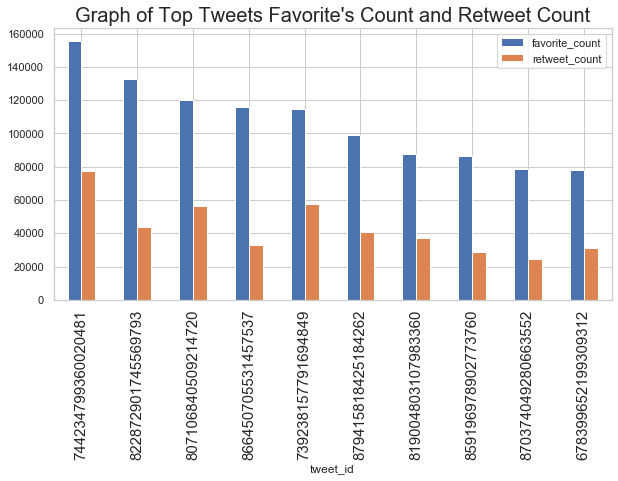

In [870]:
ax=Q1.plot.bar(x='tweet_id',rot=0,subplots=False,figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
ax.set_title("Graph of Top Tweets Favorite's Count and Retweet Count", fontsize=20);

* From the above plot we see that, the favorite tweets not necessarily has been tweeted most. For example the id 822872901745569793 has a favorite tweet of around 130000 but it retweeted 41000 times. 

###### Question 2: What day of the week were most of the tweets created?

In [871]:
Q2=final_data.groupby('timestamp_weekday').size().reset_index(name = "Number of Tweets")

print('Table of number of Tweets by weekday')

Q2

Table of number of Tweets by weekday


,timestamp_weekday,Number of Tweets
0,0,357
1,1,326
2,2,322
3,3,305
4,4,305
5,5,284
6,6,276


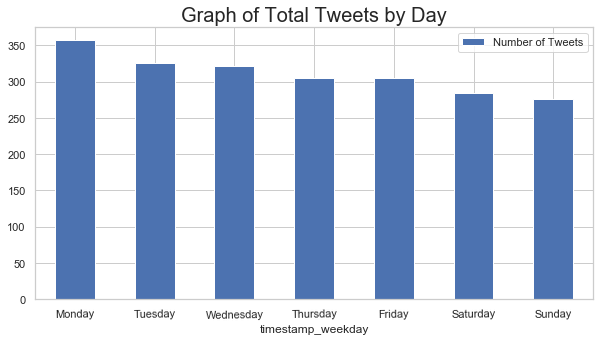

In [872]:
# create a dictionary for mapping
day = {'0':'Monday','1':'Tuesday','2':'Wednesday','3':'Thursday','4':'Friday','5':'Saturday','6':'Sunday'}

# map the dictionary 
Q2['timestamp_weekday']=Q2['timestamp_weekday'].astype(str).replace(day)

# plotting barplot
ax=Q2.plot.bar(x='timestamp_weekday',rot=1,subplots=False,figsize=(10,5))
ax.set_title("Graph of Total Tweets by Day", fontsize=20);

* It's pretty interesting that, the highest number of tweets were created on the first day of the week and the lowest on the weekend. 

In [873]:
# # # rank the names frequency in a descending order
# # final_data.name.value_counts().sort_values(ascending =False)[:10].plot(kind ='barh')
# # plt.title("Most Common Dogs' Names")
# # plt.xlabel('Frequency')
# # plt.ylabel("Dog's Name");


# final_data.name.value_counts()[0:7].plot(kind = 'barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

###### Question 3. Which dog breed is most common ?

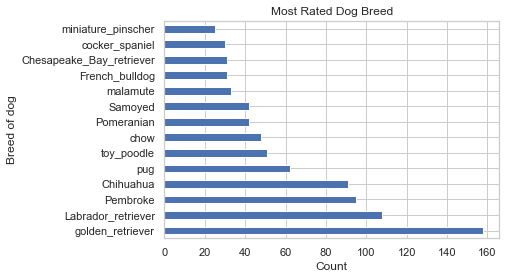

In [874]:
# Histogram to visualize dog breeeds
dog_breed = final_data.groupby('breed_pred').filter(lambda x: len(x) >= 25)

dog_breed['breed_pred'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

golden retriever is the most common dog 

###### How do @WeRateDogs accounts write their posts? (DogCloud)

In [875]:
text = final_data.text.to_string(index =False).replace('/','').strip()
def wordzcloud(text):
    
    # choose the mask from a google dog pictures
    url = 'https://thumbs.dreamstime.com/b/german-shepherd-dog-side-view-standing-isolated-white-background-54099447.jpg'
    r = requests.get(url)
    mask = np.array(Image.open(BytesIO(r.content)))

    # set stopwords
    stopwords = ('This','and','is','the','to')#set(STOPWORDS)
    # set other parameters
    wc = WordCloud(background_color= 'white',
                  mask = mask,
                  stopwords=stopwords,
                  max_words=100,
                  contour_color='blue')
    # generate the word cloud
    wc.generate(text)

    return wc.to_image()

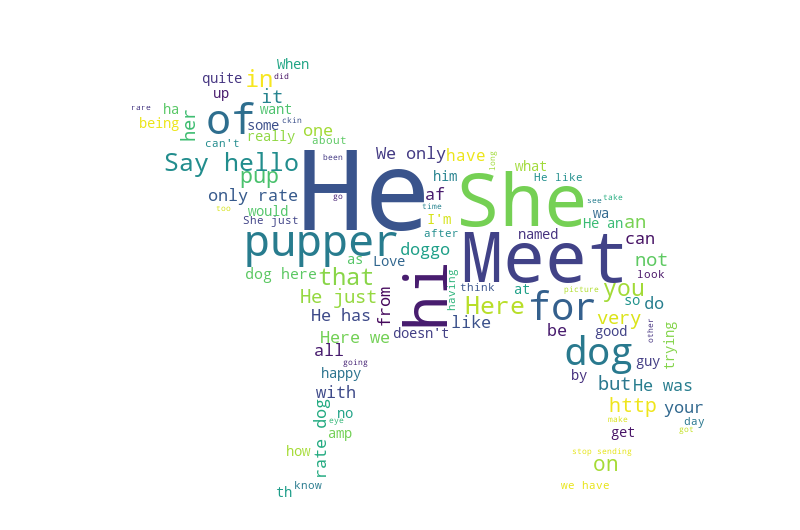

In [876]:
wordzcloud(text)

* The admin uses friendly words as Meet, Say Hello, Here ,love,like...
* The appearance of He is more than She which indicates the gender of dog is more for male dogs